## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [33]:
show(DF_raw_paintings)

Loading ITables v2.5.2 from the internet... (need help?)


In [34]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats liek we did in the lecture!

In [35]:
# Look at the data types in these columns
my_cols = ['Height_in', 'Width_in']
DF[my_cols].dtypes

Height_in    object
Width_in     object
dtype: object

In [36]:
# Update the types - these should be floats
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))
DF[my_cols].dtypes

Height_in    float64
Width_in     float64
dtype: object

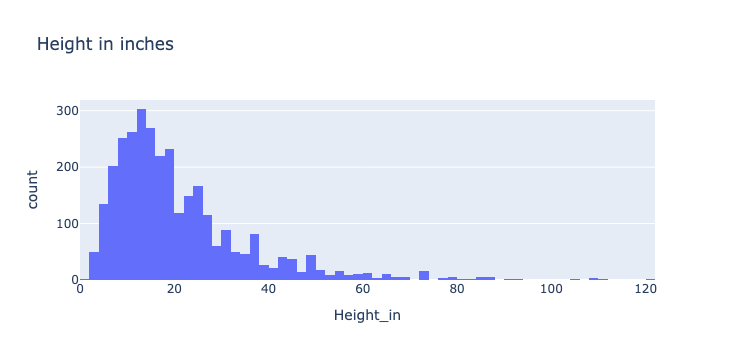

In [37]:
fig = px.histogram(DF,
                 x='Height_in',
                 title='Height in inches',
                 hover_data='name')
fig.show()

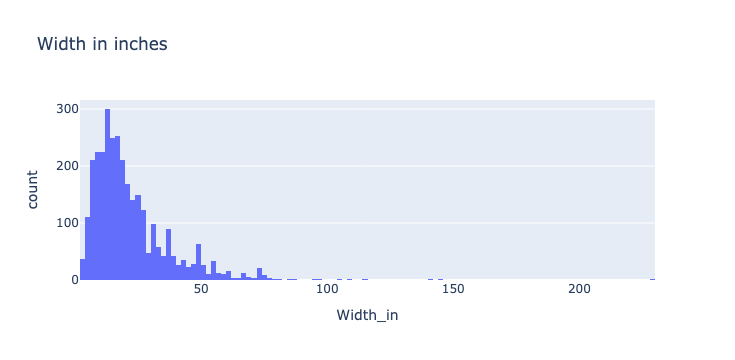

In [38]:
fig = px.histogram(DF,
                 x='Width_in',
                 title='Width in inches',
                 hover_data='name')
fig.show()

**Q2** Explain in words what these plots tell you about the data.
Answer: These plots tell me which height in inches has the most paintings, and they tell me what width in inches has the most paintings accounted for. These graphs can also show me which paintings are the tallest and the widest.

**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

Text(0.5, 1.0, 'Scatter Plot of Painting Width vs Height')

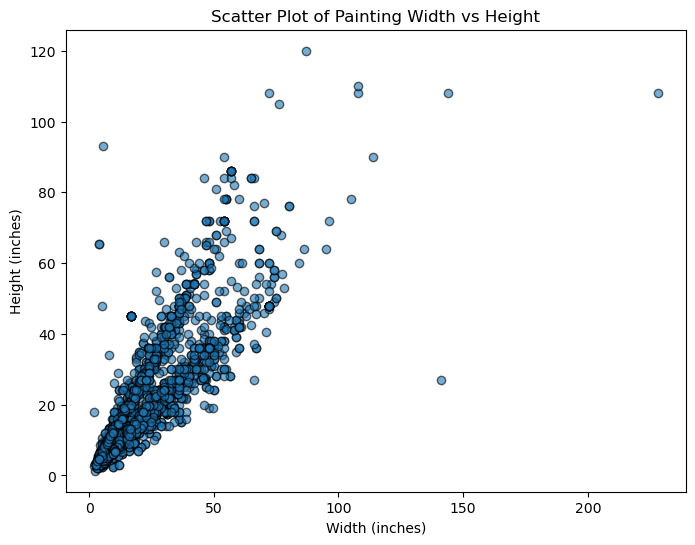

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(DF['Width_in'], DF['Height_in'], alpha=0.6, edgecolor='k')

plt.xlabel('Width (inches)')
plt.ylabel('Height (inches)')
plt.title('Scatter Plot of Painting Width vs Height')


The plot below uses Ordinary Least Squares fitting to find a reasonable line.

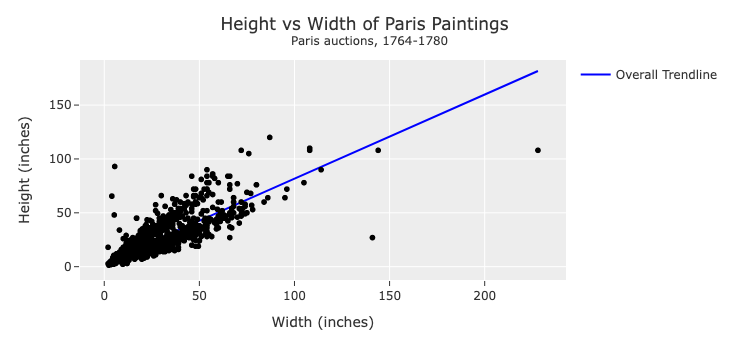

In [40]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is the most error? Explain why you think this? This is most accurate for paintings with an average-sized width, where the points land close to the line on the plot. This is because the line is supposed to be the overall average of all the paintings. The most errors are is when the lne goes further out.

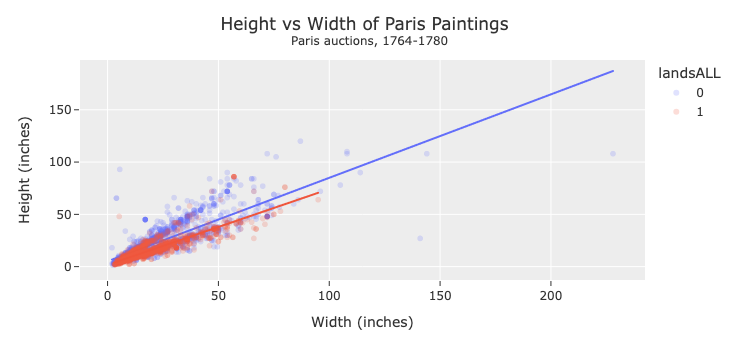

In [41]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

In [46]:
# A new package import!
from sklearn.linear_model import LinearRegression 

In [47]:
# Select the variables - I want to predict height given width
DF_model = DF[['Height_in','Width_in']]
DF_model.dtypes

Height_in    float64
Width_in     float64
dtype: object

In [48]:
# Check out the NaNs

# How many Nans
print('Number of NaNs:')
print(DF_model.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_model.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_model.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_model.isna().sum().sum())
print('----------------------')

Number of NaNs:
508
----------------------
Percent NaNs:
0.14972001178897731
----------------------
Number of NaNs after drop:
0
----------------------


In [50]:
# Create the inputs X (explanatory variable) and the outputs y (response variable)
# .values just gets the numbers that we need
# .reshape(-1,1) puts the X data in the right shape.

X = DF_model['Width_in'].values.reshape(-1, 1)
y = DF_model['Height_in'].values

In [51]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)

LinearRegression()

In [52]:
# The coefficient is the slope
LM.coef_

array([0.78079641])

In [53]:
# We can also see the intercept
LM.intercept_

np.float64(3.6214055418382074)

In [54]:
width = 33
width = np.array(width).reshape(-1,1)
LM.predict(width)

array([29.38768703])

In [55]:
width = 0
width = np.array(width).reshape(-1,1)
LM.predict(width)

array([3.62140554])

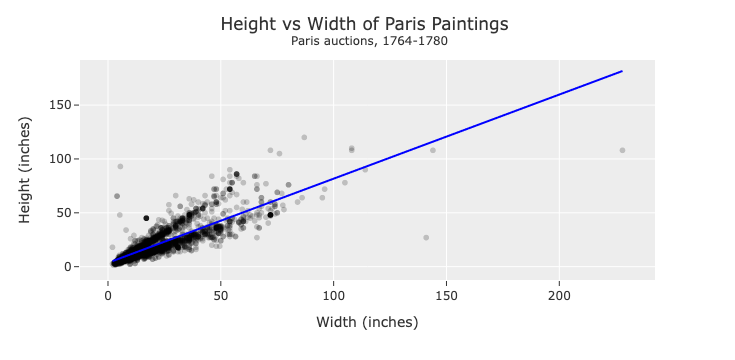

In [56]:
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

# Add the line our model would predict
DF_model = pd.DataFrame()
DF_model['w'] = DF['Width_in']
DF_model['y'] = LM.coef_*DF_model['w']+LM.intercept_
DF_model = DF_model.sort_values('w')

fig.add_trace(
    px.line(DF_model, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

In [57]:
LM.score(X, y)

0.6829467672722758

The graph shows the width vs. height of paintings, based on whether they're Pastoral or not.


## Install Scikit-Learn
Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [43]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


In [59]:
# Change those strings back into ints
DF['landsALL'] = DF['landsALL'].apply(lambda x: int(x))
# Select the variables - I want to predict height given width
DF_model = DF[['landsALL','Height_in']]
DF_model.dtypes

landsALL       int64
Height_in    float64
dtype: object

In [60]:
# Check out the NaNs

# How many Nans
print('Number of NaNs:')
print(DF_model.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_model.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_model.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_model.isna().sum().sum())
print('----------------------')

Number of NaNs:
252
----------------------
Percent NaNs:
0.07427055702917772
----------------------
Number of NaNs after drop:
0
----------------------


In [62]:
# Create the inputs X (explanatory variable) and the outputs y (response variable)
X = DF_model['landsALL'].values.reshape(-1,1)
y = DF_model['Height_in'].values
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)

LinearRegression()

In [63]:
print(LM.coef_)
print(LM.intercept_)

[-5.64512764]
22.679917906618726


In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
my_columns = ['school_pntg','price']
DF_model = DF[my_columns]
DF_model

,school_pntg,price
0,F,360.0
1,I,6.0
2,D/FL,12.0
3,F,6.0
4,F,6.0
...,...,...
3388,F,18.0
3389,F,25.0
3390,F,80.0
3391,F,5.0


In [66]:
DF_model['school_pntg'].value_counts()

school_pntg
D/FL    1492
F       1386
I        428
X         69
G          9
S          7
A          2
Name: count, dtype: int64

In [68]:
# Get the data we want to predict
X = DF_model['school_pntg'].values.reshape(-1,1)
y = DF_model['price'].values

# Now because X has lots of categories, we need to encode it:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [69]:
categories = encoder.categories_[0]
categories

array(['A', 'D/FL', 'F', 'G', 'I', 'S', 'X'], dtype=object)

In [70]:
# Look at each category and encoding
result = DF_model.groupby('school_pntg',as_index=False).first()
encoded_data = encoder.transform(result['school_pntg'].values.reshape(-1,1))



for i,e in enumerate(encoded_data.toarray()):
    print(categories[i])
    print(e)
    print('---------------------------')

A
[1. 0. 0. 0. 0. 0. 0.]
---------------------------
D/FL
[0. 1. 0. 0. 0. 0. 0.]
---------------------------
F
[0. 0. 1. 0. 0. 0. 0.]
---------------------------
G
[0. 0. 0. 1. 0. 0. 0.]
---------------------------
I
[0. 0. 0. 0. 1. 0. 0.]
---------------------------
S
[0. 0. 0. 0. 0. 1. 0.]
---------------------------
X
[0. 0. 0. 0. 0. 0. 1.]
---------------------------


**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

DF_model = DF[["school_pntg", "Surface"]].copy()

DF_model.replace('', np.nan, inplace=True)
DF_model.dropna(subset=["school_pntg", "Surface"], inplace=True)
DF_model["Surface"] = DF_model["Surface"].astype(float)

X = DF_model["school_pntg"].values.reshape(-1, 1)
y = DF_model["Surface"].values

X_encoded = pd.get_dummies(DF_model["school_pntg"], drop_first=False)

model = LinearRegression()
model.fit(X_encoded, y)

print(np.unique(DF_model["school_pntg"].values))   
print("------------------------------")
print(model.coef_)                                
print("------------------------------")
print(model.intercept_)                             

['A' 'D/FL' 'F' 'G' 'I' 'S' 'X']
------------------------------
[-392.07405573 -266.70370518  122.28794243 -393.21155573  142.65082496
 1051.64022998 -264.58968073]
------------------------------
686.0740557326305
